<a href="https://colab.research.google.com/github/sisco1113/CNN-Classifier-Cifar10/blob/main/CNN_Classifier_Cifar10_(Deep_Learning_AI_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Show the .shape of (train_images, train_labels), (test_images, test_labels)
#YOUR WORK HERE (2 pts)
print("Train_images shape:", train_images.shape)
print("Train_labels shape:", train_labels.shape)
print("Test_images shape:", test_images.shape)
print("Test_labels shape:", test_labels.shape)

170498071/170498071 [==============================] - 4s 0us/step
Train_images shape: (50000, 32, 32, 3)
Train_labels shape: (50000, 1)
Test_images shape: (10000, 32, 32, 3)
Test_labels shape: (10000, 1)


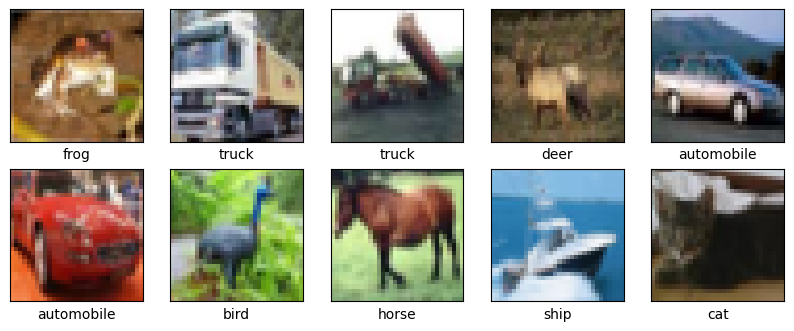

In [ ]:

# Checking the number of unique classes
#print(np.unique(train_labels))
#print(np.unique(test_labels))

# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (10): # for first 10 images
 plt.subplot(5, 5, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize input
train_images = train_images / 255
test_images = test_images / 255

# change target class to one hot encoding
# use ‘to_categorical’ function
num_classes = 10
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

#change train_labels and test_labels to one hot encoding, respectively
#use ‘to_categorical’ function
#YOUR WORK HERE (2 pts)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          3

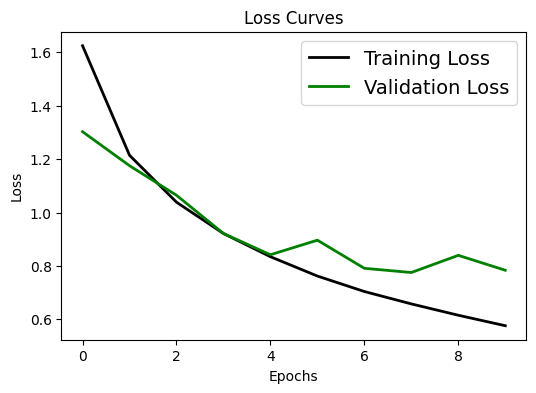

In [ ]:
# Creating a sequential model and adding layers to it

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

#Show the loss curve
#YOUR WORK HERE (2 pts)
plt.show()


In [ ]:
# Making the Predictions

#Show accuracy of test_images
#YOUR WORK HERE (2 pts)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy of test_images:', test_accuracy)

313/313 [==============================] - 6s 19ms/step - loss: 0.7837 - accuracy: 0.7353
Accuracy of test_images: 0.7353000044822693


313/313 [==============================] - 5s 16ms/step
[5 8 8 ... 5 4 7]


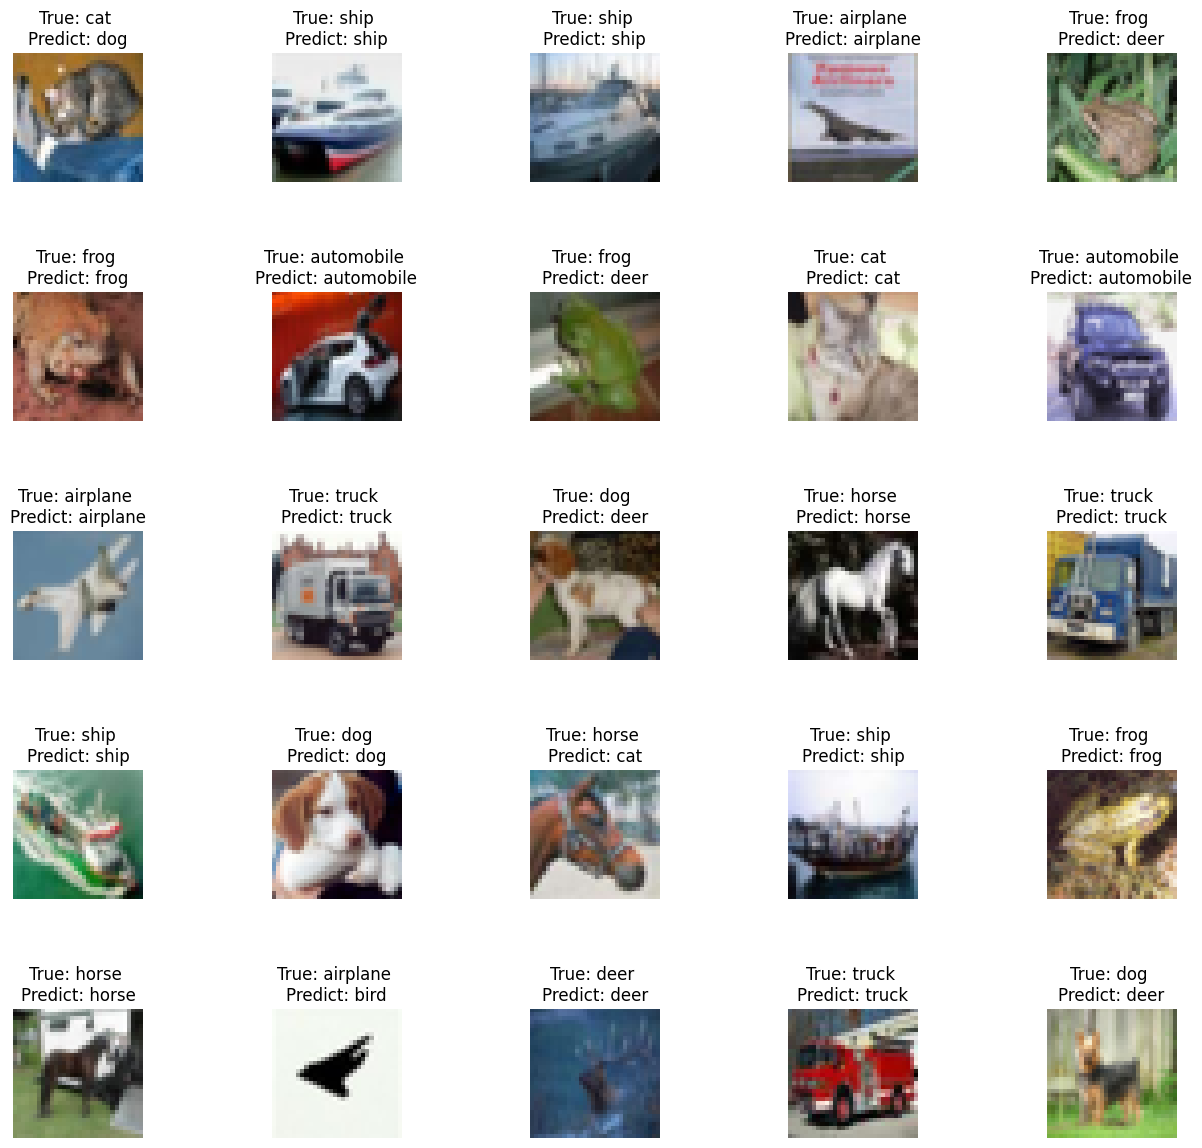

In [ ]:
# Converting the predictions into label index
pred = model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
 axes[i].imshow(test_images[i])
 axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
 axes[i].axis('off')
 plt.subplots_adjust(wspace=1)

#Show above plotting
#YOUR WORK HERE (2 pts)
plt.show()